# ANÁLISIS DE DATOS - SISTEMA DE RECOMENDACIONES

Proyecto de sistema de recomendaciones genérico a partir de recomendaciones de usuarios para películas producidas entre 1995 y 2015. 

Realizado por Rafael Delgado y Manuel García Romero.

Asignatura de Machine Learning.
Master en Ingeniería del Software: Cloud, Datos y Gestión IT.

## Dataset movielens

MovieLens es un sistema de recomendación basado en la web y una comunidad virtual que recomienda películas para que sus usuarios las vean, en función de sus preferencias cinematográficas mediante el filtrado colaborativo de las clasificaciones y críticas de películas de los miembros.

El dataset seleccionado para configurar un sistema de recomendaciones específicamente recoge más de 100.000 filas (instancias) y 4 columnas (UserID, ItemID, Rating y TimeStamp) donde hay información de 943 usuarios y 1682 películas.

Fuente: https://grouplens.org/datasets/movielens/100k/


### Carga de datos

In [1]:
import pandas as pd

In [11]:
df= pd.read_csv("./ml-100k/u.data", sep="\t", header=None)

In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
df.head()

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [15]:
#Nos indica las filas y columnas respectivamente que tiene el dataframe.
df.shape 


(100000, 4)

In [18]:
#TRANSFORMACIÓN DE LOS NOMBRE DE LAS COLUMNAS.
#La columna 0 se refiere al ID de la película, la columna 1 al ID del usuario, la columna 2 al rating.
#y la columna 3 al timestamp desde el epoch

df.columns = ["UserID", "ItemID", "Rating","TimeStamp"]
df.head()

,UserID,ItemID,Rating,TimeStamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### Análisis exploratorio de los items


In [19]:
import matplotlib.pyplot as plt

(array([ 6110.,     0., 11370.,     0.,     0., 27145.,     0., 34174.,
            0., 21201.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

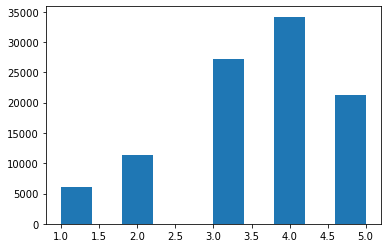

In [20]:
#Histograma para ver la distribución de los ratings que dejan los usuarios.
plt.hist(df.Rating)

(array([11459.,  5724., 19359.,  9315.,  9396., 10083.,  6175.,  9603.,
        10048.,  8838.]),
 array([8.74724710e+08, 8.76580903e+08, 8.78437096e+08, 8.80293288e+08,
        8.82149481e+08, 8.84005674e+08, 8.85861867e+08, 8.87718060e+08,
        8.89574252e+08, 8.91430445e+08, 8.93286638e+08]),
 <BarContainer object of 10 artists>)

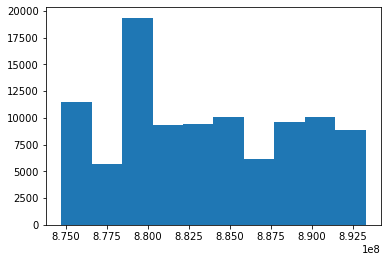

In [21]:
#Histograma para ver la distribución de las valoraciones a películas producidas 
#entre 1995 y 2015 (Timestamp en segundos desde el epoch).

plt.hist(df.TimeStamp)

#Hay valoraciones de las películas en todas las franjas de tiempo desde 1995 y 2015.

In [25]:
#Comprobar cuantas valoraciones hay para cada uno de los 5 Rating dados por los usuarios.
df.groupby(['Rating'])["UserID"].count()

Rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: UserID, dtype: int64

In [32]:
#Comprobar cuanta gente ha visto cada película (item)

VisualizacionesPeliculas= df.groupby(['ItemID'])['ItemID'].count()
VisualizacionesPeliculas




ItemID
1       452
2       131
3        90
4       209
5        86
       ... 
1678      1
1679      1
1680      1
1681      1
1682      1
Name: ItemID, Length: 1682, dtype: int64

(array([1.146e+03, 2.490e+02, 1.390e+02, 6.700e+01, 3.800e+01, 2.400e+01,
        7.000e+00, 5.000e+00, 6.000e+00, 1.000e+00]),
 array([  1. ,  59.2, 117.4, 175.6, 233.8, 292. , 350.2, 408.4, 466.6,
        524.8, 583. ]),
 <BarContainer object of 10 artists>)

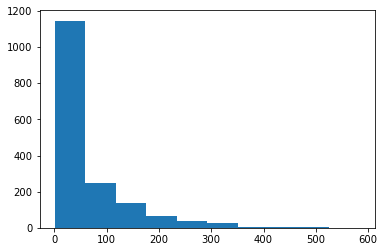

In [33]:
#A continuación, en esta gráfica se concluye que habrá películas que han sido más vistas
#y tendrán más presencia en el sistema de recomendaciones

plt.hist(VisualizacionesPeliculas)